We start by simulating a classical Riemann sum.

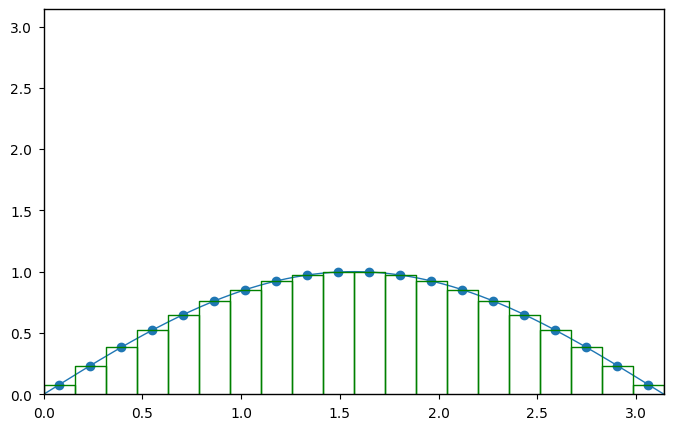

In [10]:
# These lines import the numpy library, set up matplotlib
# to be used directly in the notebook and makes division work
# like it does in Python 3, so that 1/2 = 0.5 instead of 1/2 = 0
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from __future__ import division

# Set common figure parameters:
newparams = {'axes.labelsize': 11, 'axes.linewidth': 1, 'savefig.dpi': 800, 
             'lines.linewidth': 1.0, 'figure.figsize': (8, 5),
             'ytick.labelsize': 10, 'xtick.labelsize': 10,
             'ytick.major.pad': 5, 'xtick.major.pad': 5,
             'legend.fontsize': 10, 'legend.frameon': True, 
             'legend.handlelength': 1.5}
plt.rcParams.update(newparams)

# Define a function to use as an example
def f(x):
    return np.sin(x)

# Clear plot and set limits
plt.clf()
start = 0
stop  = np.pi
plt.xlim(start, stop)
plt.ylim(start, stop)

# Plot the function to be integrated, using 1000 points
# to get a smooth curve
X = np.linspace(start, stop, 1000)
plt.plot(X, f(X))

# Draw the rectangles used in the Riemann sum
# There are N rectangles
N  = 20
# Each has width dx
dx = (stop - start)/N
# Create a vector of the midpoints of each rectangle
X  = np.linspace(start + dx/2, stop - dx/2, N)
# Draw the midpoints as circles
plt.scatter(X, f(X))
# For each rectangle, draw the borders using a line plot
for x in X:
    plt.plot([x-dx/2, x-dx/2, x+dx/2, x+dx/2], [0,f(x), f(x), 0], color = "g")

The simplest Monte Carlo integration scheme is essentially very similar to the Riemann sum method, except that the points where the function is to be evaluated are selected at random, instead of being equally spaced. Uniform sampling means that each point has the same probability of being selected.

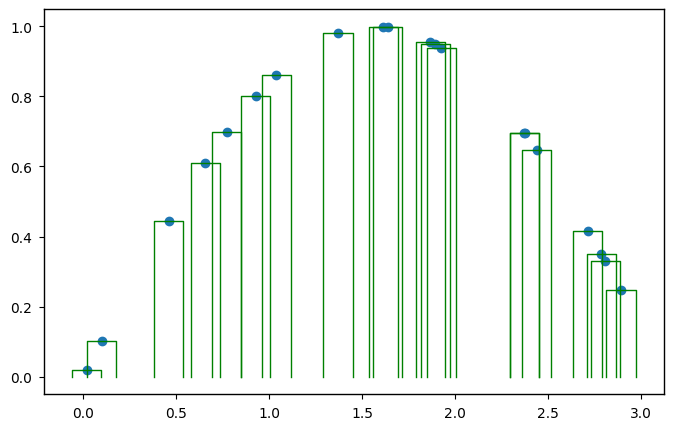

In [11]:
X  = np.random.random(N)*(stop - start) + start
# Draw the midpoints as circles
plt.scatter(X, f(X))
# For each rectangle, draw the borders using a line plot
for x in X:
    plt.plot([x-dx/2, x-dx/2, x+dx/2, x+dx/2], [0,f(x), f(x), 0], color = "g")

So in terms of functions

In [13]:
#Typical Riemann sum
def riemann_sum(f, N, a, b):
    dx = (b - a) / N
    x = np.linspace(a+dx/2, b - dx/2, N)
    return sum(f(x))*dx

#Typical Riemann sum
def monte_carlo(f, N, a, b):
    dx = (b - a) / N
    x = np.random.random(N)*(b-a) + a
    return sum(f(x))*dx

To demonstrate, we will calculate some integrals numerically. First example is

$\int_0^1 x^3 dx = 1/4$

In [17]:
def integrand(x):
    return x**3

#Number of points and interval
N = 10
a = 0 #start
b = 1 #stop

print('Riemann sum:', riemann_sum(integrand, N, a, b))
print('Monte Carlo:', monte_carlo(f, N, a, b))

Riemann sum: 0.24875
Monte Carlo: 0.3867312484898603


Monte Carlo is quite off and the answer will fluctuate for each simulation. We won't give up yet. If we look at some rapidly oscillating function for instance

$\int_0^1 sin^2(40\pi x) dx = 1/2$

In [21]:
def integrand(x):
    return np.sin(40*np.pi*x)**2

#Number of points and interval
N = 40
a = 0 #start
b = 1 #stop

print('Riemann sum:', riemann_sum(integrand, N, a, b))
print('Monte Carlo:', monte_carlo(f, N, a, b))

Riemann sum: 1.0
Monte Carlo: 0.45317208650657587


The riemann sum seems to be completely off, whereas the Monte Carlo simulation seems to be working. Using the Riemann sum, we sampled at 40 points, an as it happens, those 40 points are exactly the 40 maxima. Observe that changing the number of points (even to 41) gives a better answer for the Riemann method.

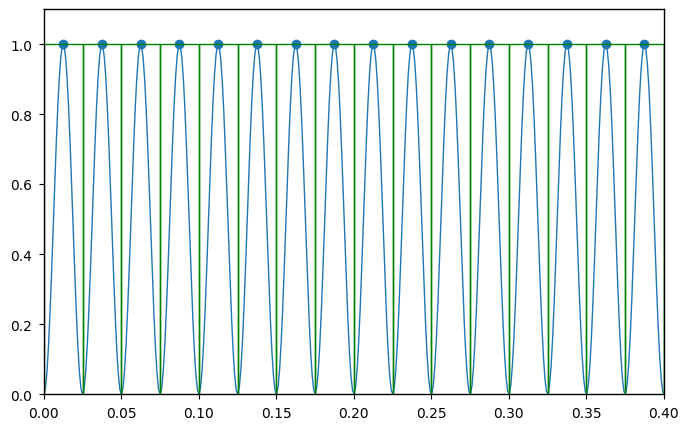

In [22]:
#The function to be integrated
def f(x):
    return np.sin(20*2*np.pi*x)**2

# Clear plot and set limits and figuresize
# We plot the interval from 0 to 0.4 only to make it easier to see
plt.clf()
plt.xlim(0, 0.4)
plt.ylim(0, 1.1)

# Plot the function to be integrated, using 1000 points
# to get a smooth curve
start = 0
stop  = 1
X = np.linspace(start, stop, 1000)
plt.plot(X, f(X))

# Draw the rectangles used in the Riemann sum
N  = 40
dx = (stop - start)/N
X  = np.linspace(start + dx/2, stop - dx/2, N)
# Draw the midpoints as circles
plt.scatter(X, f(X))
# For each rectangle, draw the borders using a line plot
for x in X:
    plt.plot([x-dx/2, x-dx/2, x+dx/2, x+dx/2], [0,f(x), f(x), 0], color = "g")

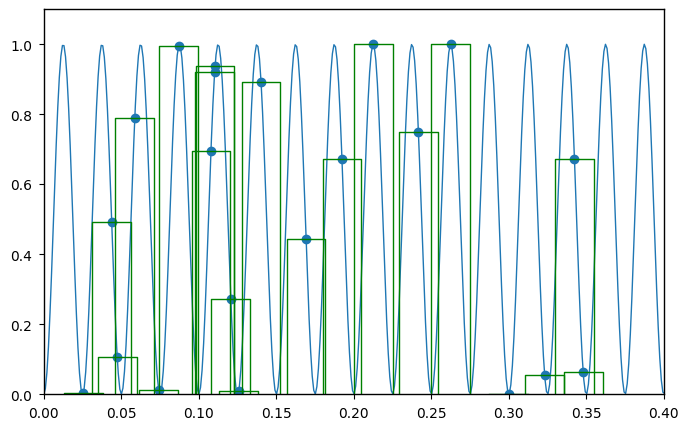

In [24]:
# The function to be integrated
def f(x):
    return np.sin(20*2*np.pi*x)**2

# Clear plot and set limits and figuresize
# We plot the interval from 0 to 0.4 only to make it easier to see
plt.clf()
plt.xlim(0, 0.4)
plt.ylim(0, 1.1)

# Plot the function to be integrated, using 1000 points
# to get a smooth curve
start = 0
stop  = 1
X = np.linspace(start, stop, 1000)
plt.plot(X, f(X))

# Draw the rectangles used in the Riemann sum
N  = 40
dx = (stop - start)/N
X  = np.random.random(N)*(stop - start) +  start
# Draw the midpoints as circles
plt.scatter(X, f(X))
# For each rectangle, draw the borders using a line plot
for x in X:
    plt.plot([x-dx/2, x-dx/2, x+dx/2, x+dx/2], [0,f(x), f(x), 0], color = "g")